# **Data Challenge** :  Wine tasting competition

*Solal Danan / sol-dnn*

*Gaspard Blaise / gaspardblaise*

*Lucas Aljancic / lucasaljc*

*Vincent Lagarde / vincent-lagarde*

*Gregoire Mourre / gregoiremrr*

*Marceau Leclerc / marssoo*

Oenology, the science and study of wine, is a field that combines tradition, expertise, and sensory analysis. France is a global leader in wine production and represents a tenth of world production. Moreover, the wine industry represents nearly 450,000 jobs in France. Renowned for its historic terroirs, exceptional wines, and culinary artistry, France is also celebrated for its mastery of sommelier expertise.



<div style="display: flex; justify-content: center;">
    <img src="img/4.jpg" alt="Image 3" style="width:30%">
</div>

Each year, wine enlightened enthusiasts and professional sommeliers compete in blind tasting competitions, where the goal is to identify key characteristics of a wine, such as its region, sub-region, grape variety, appellation, vintage, and even the estate. Participants rely on their extensive knowledge and sensory training to evaluate attributes like acidity, bitterness, tannins, color intensity, texture, and aromatic markers. For instance, a wine with pronounced lemon and hydrocarbon aromas, coupled with high acidity, is likely a Riesling from Alsace.


<div style="display: flex; justify-content: center;">
    <img src="img/3.jpg" alt="Image 3" style="width:40%">
    <img src="img/6.jpg" alt="Image 3" style="width:40%">
</div>

Inspired by this tradition, we present a Data Challenge that bridges the worlds of oenology and data science. The objective is to train a model capable of predicting the origin of a wine based on its characteristics. Using [Vivino](Vivino.com), a popular app where wine enthusiasts rate and review wines, participants will analyze various features and tasting notes to classify wines by region. This challenge is a classification problem, where the goal is to accurately determine the wine's origin.

## **DATASET PRESENTATION**

The data was obtained scraping a variety of page types on the [vivino website](vivino.com). Here is an overview of the process we went through to obtain the final dataset :
- First we selected regions of interest, that would end up being our classes, such as Bourgogne. 
- For each of these regions, we scrapped all the wines we could, ending up with a file containing URLs to 9838 wine pages.
- For each of these wine pages, we scrapped all its reviews, including the comment and other relevant information such as the number of likes, if available. We also saved the URLs of the profile providing the comment.
- Using the profiles' URLs, we scrapped other relevant informations regarding the reviewers, such as their rankings and bumber of followers.
- We merged all this information in a single `.tsv` file that can be loaded as below.

The scrapping proved to be tough, requiring a total of 3 main scrapping scripts (one for every step). It was done using selenium in an under-optimized way at first (to scrap the wines and their reviews, which took about 12 hours using 2 computers). Later on when scrapping the users' profiles we encountered a new difficulty, our IP adresses being blocked very quickly after a hundred requests. As a results, we reworked our last scrapping script to detect when we get blocked, in order to trigger a rotation in IP adress using a VPN. This last leg was also run on 2 laptops, under 8 hours total.

As a result of these difficulties and in addition to our scripts relying on computer-specific parameters (resolution for scrolling, for instance) and on manual merging of the data, we prefered not to include the code that was used to scrap this data. It has to be stressed however that all the data provided here is indeed public.

In the end, we provide a dataset comprising 100,686 reviews on a total of 9838 wines. We're interested in classifying the wines per region, so the first 75% (7378) will be used in training and the remainder will be the testing set. Prior to the splitting, the comments were shuffled and regrouped by ID.

Here is how the data is loaded :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import problem
data, y = problem.get_train_data()

In [2]:
data.head()

,wine_id,rating,vintage,comment,user,publication_date,likes,URL,Name,Country,Notes,Ranking in PT,Followers,Following
0,1,5.0,2011.0,adore this wine. full. smoky but with less ear...,Sean Howell (540 ratings),"Feb 6, 2018",3.0,https://www.vivino.com/users/sean-howe,Sean Howell,NaN,540.0,17249.0,63,172
1,1,4.5,2011.0,interesting introduction to this wine. earthy ...,Sam Ong (402 ratings),"Nov 2, 2017",6.0,https://www.vivino.com/users/m5fcd464729e44ae9...,Sam Ong,Philippines,402.0,0.0,43,17
2,1,4.0,NaN,"XXX high acidity , dark colors hints of black ...",Sherief Nazif (555 ratings),"Jan 8, 2023",2.0,https://www.vivino.com/users/sherief.nazif,Sherief Nazif,Egypt,596.0,2.0,32,10
3,1,4.5,2011.0,the perfect XXX,Winter (178 ratings),"Oct 26, 2022",0.0,https://www.vivino.com/users/wonbeen.kim,Winter,France,178.0,0.0,0,0
4,1,5.0,2011.0,"full bodied, rich, smooth",Mimi Cheng (211 ratings),"Sep 4, 2017",0.0,https://www.vivino.com/users/mimi.chen,Mimi Cheng,NaN,212.0,42985.0,3,1


In [3]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int64

We can decode the regions :

In [4]:
regions = problem.decode_label(y)
regions.head()

0    Bordeaux
1    Bordeaux
2    Bordeaux
3    Bordeaux
4    Bordeaux
Name: region, dtype: object

### **Features Overview**

Each row in the dataset corresponds to a wine review on Vivino. Below is a detailed description of the columns:

- **region**: This is the target variable we aim to predict. There are 11 distinct regions in the dataset, each with varying occurrence frequencies.

- **wine_id**: This column uniquely identifies a wine. Multiple rows may refer to the same wine if it has received multiple reviews from different users.

- **rating**: This is a user-assigned rating on a 5-point scale. A score of 5 indicates that the user highly enjoyed the wine.

- **vintage**: This represents the vintage of the wine, i.e., the year the grapes were harvested to produce the wine.

- **comment**: This is the user's review of the wine. Any information directly referencing a region has been censored. However, the comments may still contain valuable insights about the wine's characteristics that can help deduce its region.

- **user**: This refers to the Vivino user profile of the individual who left the review.

- **publication_date**: The date when the review was published.

- **likes**: The number of likes the review received from other Vivino users.

- **URL**: The full review page can be accessed via this URL.

- **Name**: The username of the Vivino user who left the review.

- **Country**: The country of the Vivino user.

- **Notes**: The total number of reviews the user has made on Vivino, reflecting their experience on the platform.

- **Ranking in PT**: The user's ranking as provided by Vivino.

- **Followers**: The number of followers the user has.

- **Following**: The number of users the user is following.

## Exploratory data analysis


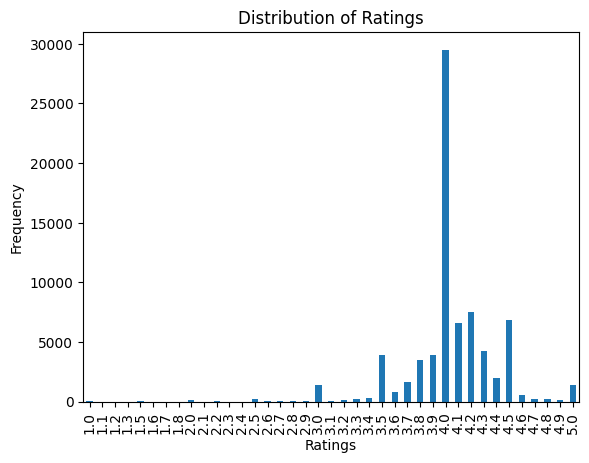

In [5]:
import matplotlib.pyplot as plt
# Distribution of ratings
data.rating.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

The reviews' grades are typically around 4 out of 5.

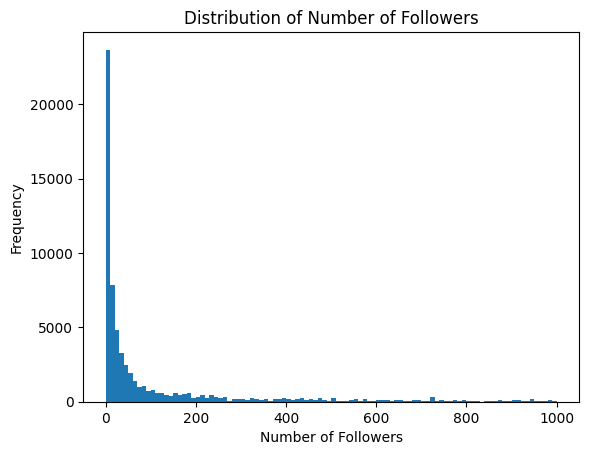

In [6]:
# Distribution of followers
plt.hist(data['Followers'], bins=100, range=(0, 1000))
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Followers')
plt.show()

We do have a few high-profile reviewers.

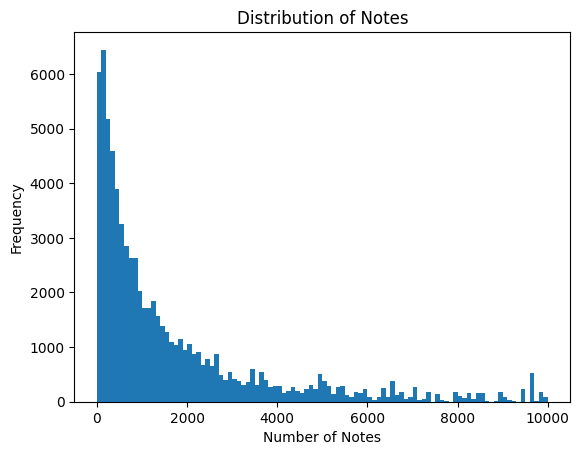

In [7]:
# Distribution of Notes
plt.hist(data['Notes'], bins=100, range=(0, 10000))
plt.xlabel('Number of Notes')
plt.ylabel('Frequency')
plt.title('Distribution of Notes')
plt.show()

We can see that some users comment much more than most others.

## Important feature : Tasting comments

In [8]:
df_comments = pd.DataFrame(data["comment"], columns=["comment"])
pd.set_option('display.max_colwidth', None)
df_comments.head()


,comment
0,adore this wine. full. smoky but with less earth than tobacco .
1,"interesting introduction to this wine. earthy notes, blackberry, vanilla, oak, spices. very chewy on the palate. balanced with velvety tannins. i thought this was the moulin 2010. good wine"
2,"XXX high acidity , dark colors hints of black cherry"
3,the perfect XXX
4,"full bodied, rich, smooth"


This will be of critical interest. We did censor (by `XXX`) the words that gave away too much information, just for the comment to not hold the classification answer in the review.

## Target : Predict the region (11 classes)

In [9]:
# Display the contents of the dataframe
regions.value_counts()

region
Bordeaux                25036
Bourgogne               11501
Vallee du Rhone          9814
Languedoc-Roussillon     8896
Vallee de la Loire       7398
Alsace                   3868
Champagne                2798
Sud Ouest                2682
Provence                 2645
Corse                     509
Savoie                    379
Name: count, dtype: int64

The target classes are heavily imbalanced. This does have implications, hence the choice of the evaluation metric (below).

## **EVALUATION METRIC**

# Balanced Accuracy Score

# Definition  
The **Balanced Accuracy Score** is a metric used to evaluate classification models, particularly when dealing with **imbalanced classes**. It is defined as the average of the **recall per class** over all classes.

# Formula  
For a multi-class classification problem with $C$ classes and its corresponding confusion matrix, the **Balanced Accuracy** is given by:

$$
\text{Balanced Accuracy} = \frac{1}{C} \sum_{i=1}^{C}\text{Accuracy}_i = \frac{1}{C} \sum_{i=1}^{C} \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i}
$$

where:  
- $ \text{TP}_i $ (True Positives) is the number of correctly classified instances of class $ i $.
- $ \text{FN}_i $ (False Negatives) is the number of instances of class $i $ misclassified into another class.


Unlike **regular accuracy**, which can be misleading in the presence of imbalanced data, **Balanced Accuracy** ensures that each class contributes equally to the final score.


## Submissions

Again, the goal is to predict the correct region for each wine. In fact, we're evaluating the classification for each review. For the baselines, we ignore the fact that there are mutliple reviews for the same one. A good model will need to take this into account.

### **BASELINES**

In [10]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split

#### Model 1 : We predict the most frequent region only

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold

def get_estimator():
    return DummyClassifier(strategy='most_frequent')

cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=57)
balanced_acc = cross_val_score(
    get_estimator(),
    data,
    y,
    cv=cv,
    groups=data['wine_id'],  # Ensure wine_ids are in the same fold
    scoring='balanced_accuracy'
)

print(balanced_acc)

[0.09090909 0.09090909]


Of course the example above is ridiculous. Let's try something more informed.

#### Model 2 : Using only comments, TF-IDF + Random Forest

In [12]:
# speeding things up (keeping a 5th of the dataset)
data_short = data.iloc[:12000]
y_short = y.iloc[:12000]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(lambda df: df["comment"].fillna(""), validate=False)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
rf_clf = RandomForestClassifier(n_estimators=100)

pipe = Pipeline([
    ("text_isolator", transformer),
    ("tfidf", vectorizer),
    ("clf", rf_clf)
])

def get_estimator():
    return pipe


# Evaluate like previously
cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=57)
balanced_acc = cross_val_score(
    get_estimator(),
    data_short,
    y_short,
    cv=cv,
    groups=data_short['wine_id'],  # Ensure wine_ids are in the same fold
    scoring='balanced_accuracy'
)

print(balanced_acc)

[0.25447657 0.2506639 ]


Note that better results were observed when using the whole dataset, here we're just looking at 20% of the sub-training set.

#### Model 3 : Using only comments, sklearn Bert classifier.


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.base import BaseEstimator, ClassifierMixin

#Custom Dataset for Wine Reviews
class WineReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=64):
        # Convert texts and labels to lists to avoid indexing issues.
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx], 
            padding="max_length", 
            truncation=True, 
            max_length=self.max_length, 
            return_tensors="pt"
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# Custom scikit-learn Estimator wrapping BERT
class BertSklearnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, pretrained_model_name="bert-base-uncased", max_length=64, epochs=1, batch_size=16, learning_rate=3e-5, device=None):
        self.pretrained_model_name = pretrained_model_name
        self.max_length = max_length
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")
        
        self.tokenizer = BertTokenizer.from_pretrained(self.pretrained_model_name)
        self.model = None  # Model will be created in fit()

    def fit(self, X, y):
        num_labels = len(np.unique(y))
        self.model = BertForSequenceClassification.from_pretrained(self.pretrained_model_name, num_labels=num_labels)
        self.model.to(self.device)
        self.model.train()
        
        dataset = WineReviewDataset(X, y, self.tokenizer, max_length=self.max_length)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        
        optimizer = optim.AdamW(self.model.parameters(), lr=self.learning_rate)
        
        for epoch in range(self.epochs):
            total_loss = 0
            for batch in dataloader:
                batch = {k: v.to(self.device) for k, v in batch.items()}
                optimizer.zero_grad()
                outputs = self.model(**batch)
                loss = outputs.loss
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            #print(f"Epoch {epoch+1}/{self.epochs} - Loss: {total_loss/len(dataloader):.4f}")
        return self
    
    def predict(self, X):
        dataset = WineReviewDataset(X, [0] * len(X), self.tokenizer, max_length=self.max_length)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        self.model.eval()
        preds = []
        with torch.no_grad():
            for batch in dataloader:
                # Exclude "labels" during prediction.
                inputs = {k: v.to(self.device) for k, v in batch.items() if k != "labels"}
                outputs = self.model(**inputs)
                logits = outputs.logits
                batch_preds = torch.argmax(logits, dim=1).cpu().numpy()
                preds.extend(batch_preds)
        return np.array(preds)
    
    def predict_proba(self, X):
        # Returns class probabilities via softmax.
        dataset = WineReviewDataset(X, [0] * len(X), self.tokenizer, max_length=self.max_length)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        self.model.eval()
        all_probs = []
        with torch.no_grad():
            for batch in dataloader:
                inputs = {k: v.to(self.device) for k, v in batch.items() if k != "labels"}
                outputs = self.model(**inputs)
                logits = outputs.logits
                probs = torch.softmax(logits, dim=1).cpu().numpy()
                all_probs.extend(probs)
        return np.array(all_probs)
    
    def score(self, X, y):
        # Use balanced accuracy as the score.
        from sklearn.metrics import balanced_accuracy_score
        preds = self.predict(X)
        return balanced_accuracy_score(y, preds)


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedGroupKFold, cross_val_score

# Transformer: isolate the "comment" column and fill missing values.
transformer = FunctionTransformer(lambda df: df["comment"].fillna(""), validate=False)

# Instantiate the custom BERT classifier.
bert_clf = BertSklearnClassifier(
    pretrained_model_name="bert-base-uncased",
    max_length=128,
    epochs=1,
    batch_size=16,
    learning_rate=3e-5
)

# Build the pipeline: extract text then classify using BERT.
pipe = Pipeline([
    ("text_isolator", transformer),
    ("clf", bert_clf)
])

def get_estimator():
    return pipe

# Evaluate using StratifiedGroupKFold with groups (e.g., wine_id stays in one fold)
cv = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=57)
balanced_acc = cross_val_score(
    get_estimator(),
    data_short,
    y_short,
    cv=cv,
    groups=data_short['wine_id'],
    scoring='balanced_accuracy'
)

print(balanced_acc)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/marceau/.local/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[0.2299096 0.1962242]


/home/marceau/.local/lib/python3.10/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## **SUBMISSION**

The default model in the starting kit is the 2nd one (using TF-IDF).

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html). You can try the code locally by running:

In [16]:
!ramp-test --submission starting_kit --quick-test

Testing Wine Competition
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  accuracy       time
	train    0.7640  39.945689
	valid    0.2246   1.849333
	test     0.1936   0.616435
CV fold 1
	score  accuracy       time
	train    0.7643  39.487994
	valid    0.2540   1.833566
	test     0.1905   0.639411
CV fold 2
	score  accuracy       time
	train    0.7676  40.183343
	valid    0.2179   1.891427
	test     0.1978   0.654540
CV fold 3
	score  accuracy       time
	train    0.7619  40.140366
	valid    0.2164   1.833086
	test     0.1874   0.632785
CV fold 4
	score  accuracy       time
	train    0.7635  40.364451
	valid    0.2256   1.998226
	test     0.1941   0.641278
CV fold 5
	score  accuracy       time
	train    0.7658  41.332711
	valid    0.2011   1.892440
	test     0.1962   0.635361
CV fold 6
	score  accuracy       time
	train    0.7655  40.714694
	valid    0.1938   1.856097
	test     0.2003   0.640618
CV fold 7
	score  accu

## **Good luck for this competition !** 

<div style="display: flex; justify-content: center;">
    <img src="img/5.jpg" alt="Image 3" style="width:60%">
</div>